# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [63]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
1842 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 1842
Submissions graded.


### Dataset

In [64]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [65]:
# Filter by institution
specific_institutions = ['Universitetet i Oslo (UiO)'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [66]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [67]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [68]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1625 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    784
Universitetet i Stavanger (UiS)                          331
Universitetet i Oslo (UiO)                               214
Universtitetet i Bergen (UiB)                            159
Høgskolen i Østfold                                       95
Høgskulen på Vestlandet (HVL)                             39
Name: count, dtype: int64


<Axes: ylabel='count'>

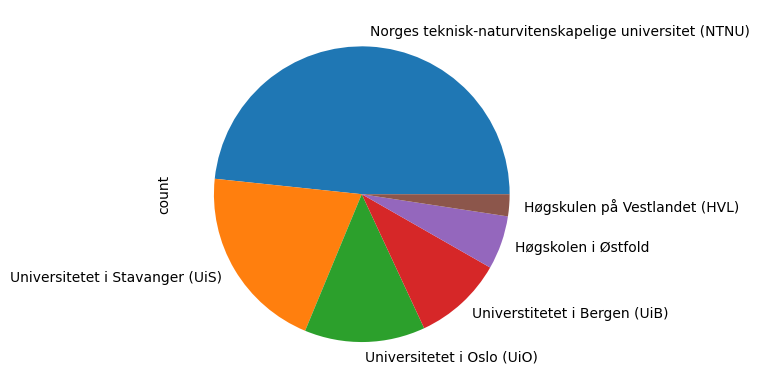

In [69]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     400
2023     341
2022     319
2021     120
2019      75
2020      71
2018      33
2017      28
2015      20
2014      20
2016      13
2012      10
Annet      8
2005       8
2011       4
2007       4
2010       3
2009       3
2008       2
2006       2
Name: count, dtype: int64


<Axes: ylabel='count'>

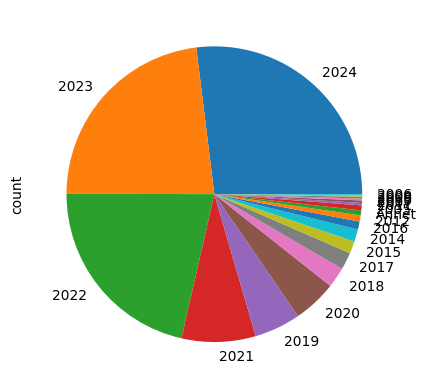

In [70]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    972
f    533
     120
Name: count, dtype: int64
Gender
m    0.598154
f    0.328000
     0.073846
Name: proportion, dtype: float64


<Axes: ylabel='count'>

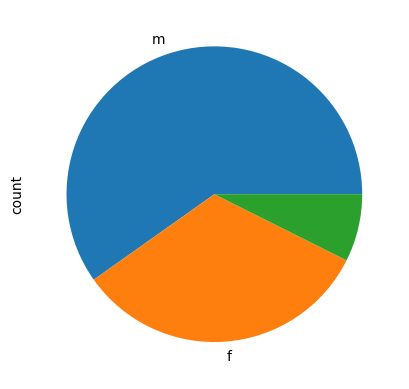

In [71]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [72]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

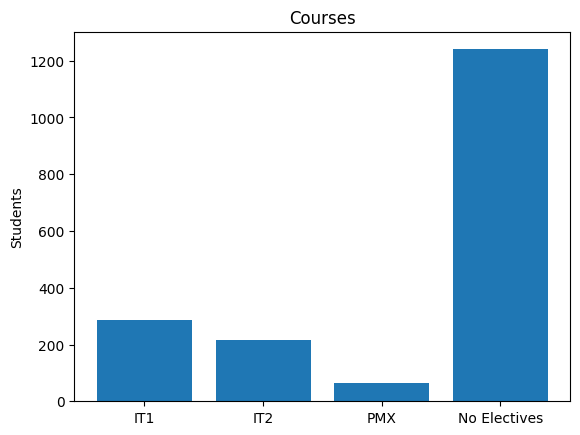

In [73]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

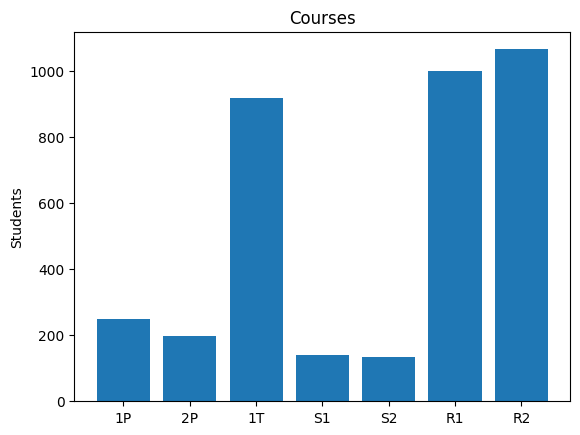

In [74]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    1246
Ja      375
Name: count, dtype: int64
OutsideExperience
Nei    0.768661
Ja     0.231339
Name: proportion, dtype: float64


<Axes: ylabel='count'>

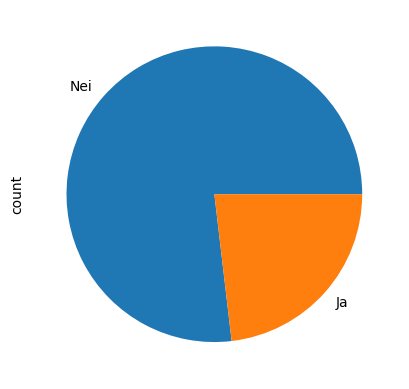

In [75]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [76]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 22.902
Standard deviation: 16.611


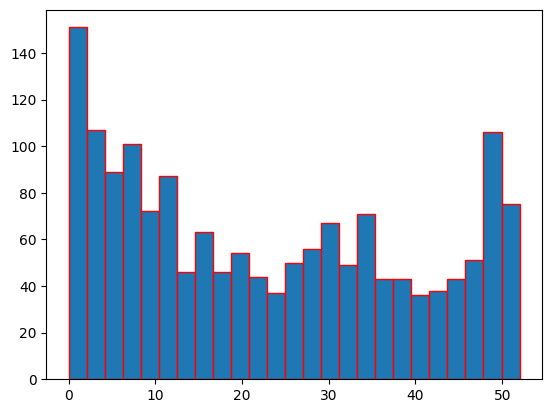

In [77]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

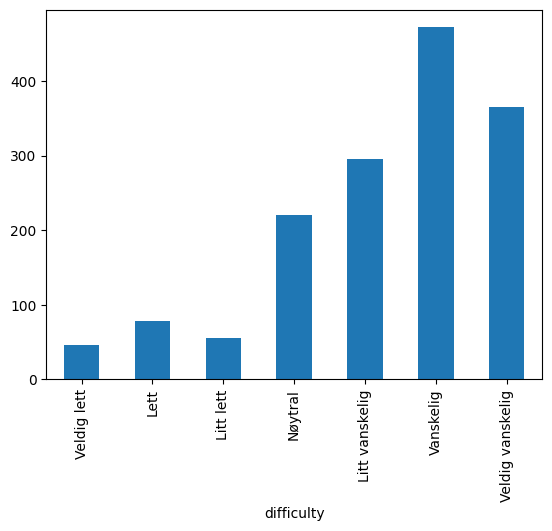

In [78]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [79]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 29.015
Standard deviation of 2023 and 2024: 15.517

Mean of before 2023: 17.778
Standard deviation of before 2023: 15.748


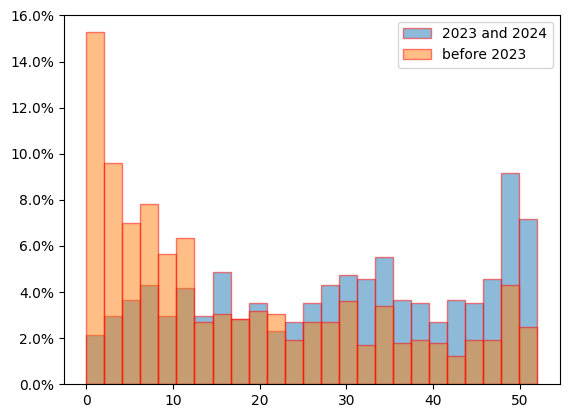

In [80]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 16.899
Standard deviation of women: 14.878

Mean of men: 26.081
Standard deviation of men: 16.647


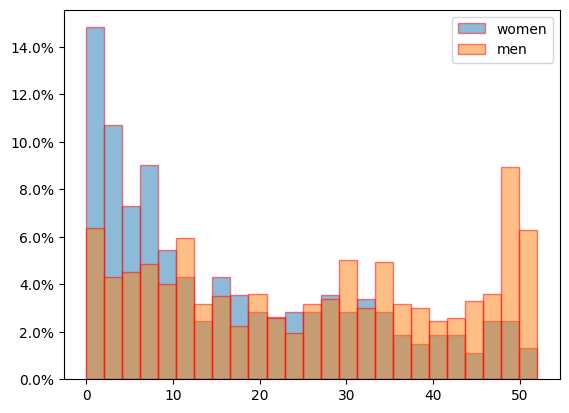

In [81]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [82]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [83]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       53.74 %
Booleans        62.06 %
Variables       52.38 %
Conditionals    57.18 %
Loops           29.54 %
Lists           33.66 %
Functions       21.90 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [84]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [85]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    821
0    804
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             821
Jeg vet ikke    553
str             104
float            74
list             40
bool             26
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    824
0    801
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           824
Jeg vet ikke    563
int             110
str              76
bool             33
list              8
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    904
1    721
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             721
Jeg vet ikke    668
int              71
float            69
bool             62
list             17
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1127
0     498
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            1127
Jeg vet ikke    

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [86]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    1331
0     294
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            1331
I don't know     186
12.0              21
1212.0             9
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [87]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1107
0     518
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1107
I don't know     276
13.0               8
12.23              5
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [88]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1099
1     526
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        526
I don't know    396
246.0           153
123.0            10
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [89]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    1031
0     594
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             1031
I don't know     329
1.0               86
3.0               34
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [90]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1122
1     503
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    601
bca             492
abc              15
'bca'            15
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [91]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    953
0    672
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0      953
10.0       87
1.0         4
30.0        3
15.0        2
0.5         1
10.2        1
220.0       1
1020.0      1
80.0        1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    954
0    671
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            954
I don't know    573
10.0             72
2.0               3
15.0              2
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [92]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    901
0    724
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    901
20.0     90
2.0       3
40.0      1
30.0      1
0.5       1
0.0       1
1.0       1
80.0      1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    884
0    741
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            884
I don't know    611
20.0            103
1.0               3
30.0              2
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [93]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    881
0    744
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    881
10.0     74
30.0      3
29.0      1
1.0       1
0.5       1
0.0       1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    848
1    777
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            777
I don't know    651
10.0            170
2.0               1
1.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [94]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    841
1    784
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
 10.0    784
 20.0    143
 1.0       2
 40.0      2
 10.2      1
-10.0      1
 30.0      1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    832
0    793
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            832
I don't know    667
20.0             95
2.0               2
30.0              2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [95]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    869
0    756
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    869
30.0     46
10.0     46
1.0       3
0.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    903
0    722
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    903
 20.0     27
 10.0     24
 2.0       2
 15.0      2
 3.0       1
-10.0      1
 1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    897
0    728
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            897
I don't know    642
10.0             25
20.0             23
3.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [96]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    861
0    764
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    861
20.0     35
10.0     27
0.0       2
6.0       1
60.0      1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    911
1    714
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
 30.0    714
 10.0    175
 20.0     32
 0.0       2
-20.0      1
 40.0      1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    919
1    706
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            706
I don't know    662
20.0            151
10.0             62
60.0              2
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [97]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            1301
Jeg vet ikke     257
False             37
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           1431
Jeg vet ikke     117
True              49
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            1188
Jeg vet ikke     209
False            197
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1403
Jeg vet ikke     133
True              52
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1373
Jeg vet ikke     146
False             76
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           1278
Jeg vet ikke     276
True              42
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [98]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           880
Jeg vet ikke    650
True             59
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           1197
Jeg vet ikke     340
True              53
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            834
Jeg vet ikke    440
False           313
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            1188
Jeg vet ikke     351
False             42
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            968
Jeg vet ikke    442
False           175
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    879
True            635
False            78
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [99]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    806
False           709
True             69
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    817
False           671
True             91
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    782
True            716
False            76
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            798
Jeg vet ikke    701
False            80
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    737
True            641
False           197
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    948
True            510
False           121
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [100]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            1287
Jeg vet ikke     201
False             99
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           1199
Jeg vet ikke     360
True              28
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           1193
Jeg vet ikke     284
True             104
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            923
Jeg vet ikke    358
False           296
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            1127
Jeg vet ikke     338
False            122
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           753
Jeg vet ikke    655
True            174
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [101]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1100
0     525
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1100
Jeg vet ikke     291
1                215
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [102]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    820
1    805
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               805
Jeg vet ikke    611
1               106
1 og 2           49
Ingenting        34
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [103]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    909
0    716
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               909
Jeg vet ikke    440
2 og 3           92
3                49
1 og 2           41
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [104]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    903
0    722
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          903
Jeg vet ikke    448
1               103
1, 2 og 3        40
2                33
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [105]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1082
1     543
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            543
I don't know    479
1.0             192
9.0             177
123456789.0      89
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [106]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1119
1     506
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            506
I don't know    492
2.0             189
8.0             157
2468.0           87
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [107]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    859
1    766
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             766
I don't know    632
0                55
102              46
98                6
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [108]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1178
1     447
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    629
4.0             447
3.0             137
1.0             131
0.0              69
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [109]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    1207
1     418
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    1042
5.0              418
0.0               29
113.0             17
3.0               14
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [110]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    1258
1     367
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1067
9.0              367
0.0               41
-5.0              12
5.0               12
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [111]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1143
1     482
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    699
20.0            482
10.0            347
102030.0         30
60.0              7
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [112]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1150
1     475
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    738
25.0            475
15.0            308
152535.0         12
65.0              7
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [113]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    823
1    802
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    802
Jeg vet ikke    633
[15, 35, 55]     42
[5, 15, 25]      16
[10, 35, 30]      9
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    1196
1     429
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    796
[5, 35, 25]     429
[15, 35, 55]    205
[5, 15, 25]      77
[10, 35, 30]     21
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [114]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    919
1    706
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    823
15.0            706
5.1              18
510.0            10
9.0               1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [115]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1145
1     480
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    1000
1.0              480
2.0               40
100.0             30
0.0                2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [116]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1380
1     245
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    993
1.0             245
12.0            143
1.2              70
2.0              50
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [117]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    1287
1     338
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1144
5.0              338
6.0               27
0.0                6
2.0                2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [118]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    1250
1     375
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    893
10.0            375
6.0             114
9.0              63
5.0              43
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [119]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    1339
1     286
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    1188
abcxyz           281
abcxabcyabcz       8
abc                6
Abcxyz             5
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [120]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    1289
1     336
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1124
c                327
b                 32
C                  9
2                  5
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [121]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    1262
1     363
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1098
25.0             363
15.0              46
152535.0           6
65.0               5
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [122]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    1551
1      74
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    1199
80.0             122
90.0              74
21.0              21
60.0              16
Name: count, dtype: int64
